In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from tensorflow import keras
from keras.utils import to_categorical
from keras.optimizers import RMSprop, Adagrad, Adam


In [128]:
test = pd.read_csv("phpYLeydd_test.csv", header = None)
train = pd.read_csv("phpYLeydd_train_4.csv", header = None)

In [129]:
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,0.000633,-0.000152,-0.000002,-0.000373,-0.000283,-3.400000e-07,0.000676,-0.000138,-0.000008,-0.000875,-0.000283,0.000003,0.000010,8.600000e-07,5.300000e-07,-0.000699,0.000491,-0.000050,0.000006,-5.600000e-07,0.000001,-0.000749,-0.000167,-0.000013,0.000651,0.000468,0.000690,0.000920,0.000010,0.000856,0.000006,0.000767,'D'
1,0.000123,0.001047,0.000086,-0.000401,0.001100,1.223100e-04,0.000250,0.000986,0.000007,-0.000226,0.001063,0.000021,-0.000036,-6.871000e-05,-1.018000e-05,0.000027,-0.000053,-0.000006,-0.000017,-5.143000e-05,-0.000003,0.000064,-0.000093,0.000005,0.001057,0.001177,0.001018,0.001087,0.000078,0.000060,0.000054,0.000113,'H'
2,0.006104,0.002797,-0.000024,-0.000015,-0.001238,7.484100e-04,-0.002624,0.000133,-0.000184,-0.001631,-0.002010,0.000517,-0.000708,-7.862000e-05,1.870000e-06,-0.000210,-0.000134,-0.000017,0.000765,6.546000e-05,0.000065,-0.000290,-0.000217,-0.000003,0.006715,0.001446,0.002634,0.002640,0.000712,0.000250,0.000770,0.000362,'P'
3,-0.007968,0.002198,0.000870,0.014916,0.019299,3.912580e-03,-0.010871,0.003741,0.001681,0.010360,0.012908,0.002453,0.000106,-1.507050e-03,-9.418000e-05,0.000390,0.000346,0.000056,-0.000360,-1.564130e-03,-0.000138,0.000059,0.000509,-0.000207,0.008311,0.024703,0.011619,0.016732,0.001514,0.000525,0.001611,0.000553,'P'
4,0.000025,-0.000394,0.000047,-0.000646,-0.000440,5.892000e-05,-0.000117,-0.000150,0.000004,-0.000313,-0.000216,0.000101,-0.000086,3.276000e-05,-2.500000e-06,-0.000087,0.000009,0.000010,-0.000010,9.200000e-07,0.000003,-0.000047,0.000013,0.000005,0.000397,0.000784,0.000190,0.000393,0.000092,0.000088,0.000010,0.000049,'D'


In [130]:
train.shape, test.shape

((7869, 33), (2004, 33))

In [131]:
train_X = train.iloc[:,:-1].values
train_y = train.iloc[:,-1].values
test_X = test.iloc[:,:-1].values
test_y = test.iloc[:,-1].values

In [132]:
train_X = normalize(train_X)
test_X = normalize(test_X)

### Replacing the characters by int to proceed with the implementation

In [133]:
def replace(Y) : 
  for i in range(len(Y)): 
    if Y[i]== "'D'":
      Y[i]=0
    if Y[i]== "'P'":
      Y[i]=1
    if Y[i]== "'S'":
      Y[i]=2
    if Y[i]== "'H'":
      Y[i]=3
    if Y[i]== "'R'":
      Y[i]=4
  return Y

In [134]:
test_y = replace(test_y)

In [135]:
train_y = replace(train_y)

In [136]:
train_y

array([0, 3, 1, ..., 1, 1, 2], dtype=object)

In [137]:
train_y = to_categorical(train_y, num_classes=5)
test_y = to_categorical(test_y, num_classes=5)

### Now the data preprocessing done, let's start with applying some neural networks

Let's start with a 2 layer network, with 24 neurons on the first layer and 5 on the second as the possible outputs

### First network

In [138]:
model_1 = keras.Sequential()
model_1.add(keras.layers.Dense(24, input_dim = 32, activation = "relu"))
model_1.add(keras.layers.Dense(5, activation= "softmax"))

In [139]:
model_1.compile(optimizer='adam', loss = "categorical_crossentropy", metrics = ["accuracy"])

In [140]:
history = model_1.fit(train_X, train_y, validation_split=0.2, batch_size=512, epochs=200)

Epoch 1/200
13/13 [==============================] - 1s 19ms/step - loss: 1.6074 - accuracy: 0.2035 - val_loss: 1.5840 - val_accuracy: 0.2522
Epoch 2/200
13/13 [==============================] - 0s 5ms/step - loss: 1.5785 - accuracy: 0.2559 - val_loss: 1.5585 - val_accuracy: 0.2980
Epoch 3/200
13/13 [==============================] - 0s 6ms/step - loss: 1.5511 - accuracy: 0.2974 - val_loss: 1.5366 - val_accuracy: 0.3119
Epoch 4/200
13/13 [==============================] - 0s 5ms/step - loss: 1.5313 - accuracy: 0.3083 - val_loss: 1.5176 - val_accuracy: 0.3202
Epoch 5/200
13/13 [==============================] - 0s 5ms/step - loss: 1.5113 - accuracy: 0.3180 - val_loss: 1.5017 - val_accuracy: 0.3304
Epoch 6/200
13/13 [==============================] - 0s 5ms/step - loss: 1.4973 - accuracy: 0.3281 - val_loss: 1.4888 - val_accuracy: 0.3380
Epoch 7/200
13/13 [==============================] - 0s 6ms/step - loss: 1.4791 - accuracy: 0.3389 - val_loss: 1.4787 - val_accuracy: 0.3469
Epoch 8/200


In [141]:
pred = model_1.predict(test_X)

In [142]:
np.argmax(pred[0])

2

In [143]:
test_y[0]

array([0., 0., 1., 0., 0.], dtype=float32)

As we can see on this trial we obtain the right prediction for the first element. But it is not significant to explain how the model performs.

#### Visualization

In [144]:
accuracy = history.history["accuracy"]

In [145]:
val_accuracy = history.history["val_accuracy"]

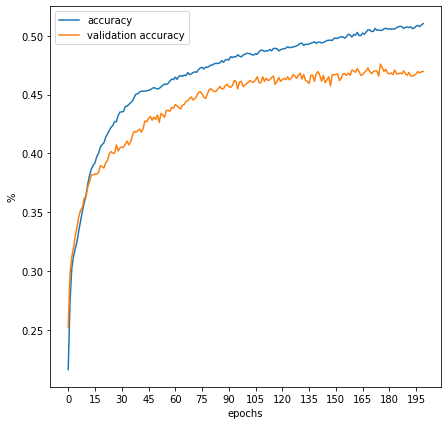

In [146]:
plt.figure(figsize=(7,7))
plt.plot(accuracy, label="accuracy")
plt.plot(val_accuracy, label="validation accuracy")
plt.legend()
plt.xticks(np.arange(0, 200, step=15))
plt.xlabel('epochs')
plt.ylabel("%")
plt.show()

overfitting from step 30

In [147]:
loss = history.history["loss"]

In [148]:
val_loss = history.history["val_loss"]

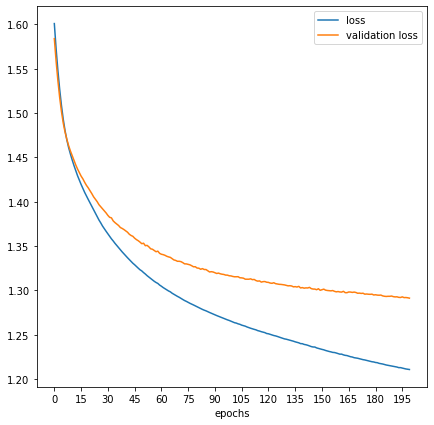

In [149]:
plt.figure(figsize=(7,7))
plt.plot(loss, label="loss")
plt.plot(val_loss, label="validation loss")
plt.legend()
plt.xticks(np.arange(0, 200, step=15))
plt.xlabel('epochs')
plt.show()

In [150]:
model_1.evaluate(test_X,test_y)

63/63 [==============================] - 0s 1000us/step - loss: 1.2692 - accuracy: 0.4686


[1.2691893577575684, 0.46856287121772766]

With an accuracy below 50%, we will try to find a better model with more neurons

### Second network

In [151]:
model_2 = keras.Sequential()
model_2.add(keras.layers.Dense(64, input_dim = 32, activation = "relu"))
model_2.add(keras.layers.Dense(5, activation= "softmax"))

Still we keep 200 epochs, the optimizer will be tested and modified to the best model with adam

In [152]:
model_2.compile(optimizer='adam', loss = "categorical_crossentropy", metrics = ["accuracy"])

In [153]:
history_2 = model_2.fit(train_X, train_y, validation_split=0.2, batch_size=512, epochs=200)

Epoch 1/200
13/13 [==============================] - 1s 18ms/step - loss: 1.5951 - accuracy: 0.2390 - val_loss: 1.5601 - val_accuracy: 0.3088
Epoch 2/200
13/13 [==============================] - 0s 6ms/step - loss: 1.5432 - accuracy: 0.3232 - val_loss: 1.5232 - val_accuracy: 0.3621
Epoch 3/200
13/13 [==============================] - 0s 5ms/step - loss: 1.5099 - accuracy: 0.3661 - val_loss: 1.4989 - val_accuracy: 0.3825
Epoch 4/200
13/13 [==============================] - 0s 6ms/step - loss: 1.4828 - accuracy: 0.3815 - val_loss: 1.4820 - val_accuracy: 0.3875
Epoch 5/200
13/13 [==============================] - 0s 5ms/step - loss: 1.4686 - accuracy: 0.3884 - val_loss: 1.4684 - val_accuracy: 0.3914
Epoch 6/200
13/13 [==============================] - 0s 6ms/step - loss: 1.4525 - accuracy: 0.3945 - val_loss: 1.4571 - val_accuracy: 0.4009
Epoch 7/200
13/13 [==============================] - 0s 7ms/step - loss: 1.4464 - accuracy: 0.3986 - val_loss: 1.4466 - val_accuracy: 0.3939
Epoch 8/200


#### Visualization

In [154]:
val_accuracy = history_2.history["val_accuracy"]

In [155]:
accuracy = history_2.history["accuracy"]

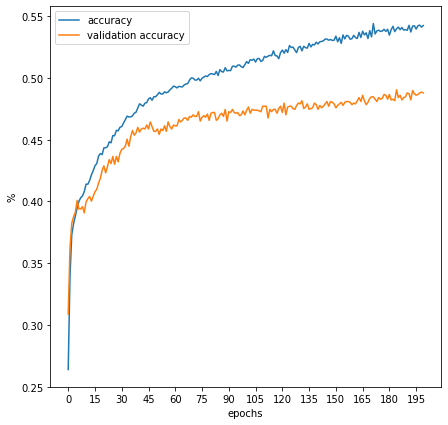

In [156]:
plt.figure(figsize=(7,7))
plt.plot(accuracy, label="accuracy")
plt.plot(val_accuracy, label="validation accuracy")
plt.legend()
plt.xticks(np.arange(0, 200, step=15))
plt.xlabel('epochs')
plt.ylabel("%")
plt.show()

In [157]:
model_2.evaluate(test_X, test_y)

63/63 [==============================] - 0s 1ms/step - loss: 1.2309 - accuracy: 0.4875


[1.2308564186096191, 0.48752495646476746]

Not a good accuracy to keep this network

In [158]:
loss = history_2.history["loss"]

In [159]:
val_loss = history_2.history["val_loss"]

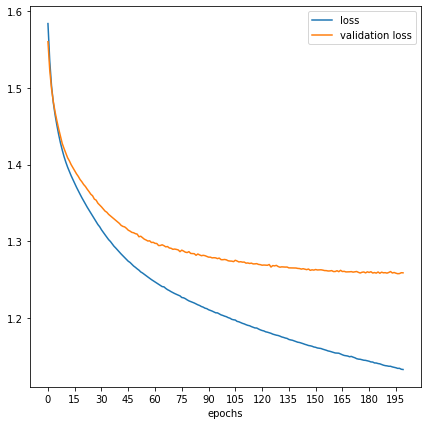

In [160]:
plt.figure(figsize=(7,7))
plt.plot(loss, label="loss")
plt.plot(val_loss, label="validation loss")
plt.legend()
plt.xticks(np.arange(0, 200, step=15))
plt.xlabel('epochs')
plt.show()

Let's try with an even bigger network but still with 2 layers

### Third network

In [161]:
model_3 = keras.Sequential()
model_3.add(keras.layers.Dense(128, input_dim = 32, activation = "relu"))
model_3.add(keras.layers.Dense(5, activation= "softmax"))

In [162]:
model_3.compile(optimizer='adam', loss = "categorical_crossentropy", metrics = ["accuracy"])

In [163]:
history_3 = model_3.fit(train_X,train_y, validation_split=0.2, batch_size=512, epochs = 200)

Epoch 1/200
13/13 [==============================] - 1s 40ms/step - loss: 1.5759 - accuracy: 0.3168 - val_loss: 1.5316 - val_accuracy: 0.3494
Epoch 2/200
13/13 [==============================] - 0s 5ms/step - loss: 1.5180 - accuracy: 0.3574 - val_loss: 1.4918 - val_accuracy: 0.3653
Epoch 3/200
13/13 [==============================] - 0s 6ms/step - loss: 1.4785 - accuracy: 0.3640 - val_loss: 1.4695 - val_accuracy: 0.3780
Epoch 4/200
13/13 [==============================] - 0s 6ms/step - loss: 1.4635 - accuracy: 0.3797 - val_loss: 1.4533 - val_accuracy: 0.3907
Epoch 5/200
13/13 [==============================] - 0s 5ms/step - loss: 1.4332 - accuracy: 0.3997 - val_loss: 1.4388 - val_accuracy: 0.3895
Epoch 6/200
13/13 [==============================] - 0s 6ms/step - loss: 1.4242 - accuracy: 0.3995 - val_loss: 1.4247 - val_accuracy: 0.3952
Epoch 7/200
13/13 [==============================] - 0s 6ms/step - loss: 1.4143 - accuracy: 0.4046 - val_loss: 1.4153 - val_accuracy: 0.3996
Epoch 8/200


#### Visualization

In [164]:
accuracy=history_3.history["accuracy"]

In [165]:
val_accuracy=history_3.history["val_accuracy"]

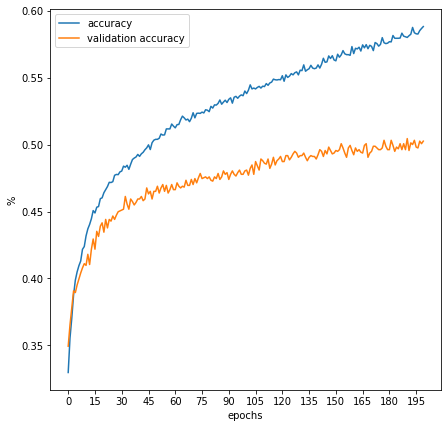

In [166]:
plt.figure(figsize=(7,7))
plt.plot(accuracy, label="accuracy")
plt.plot(val_accuracy, label="validation accuracy")
plt.legend()
plt.xticks(np.arange(0, 200, step=15))
plt.xlabel('epochs')
plt.ylabel("%")
plt.show()

We can see clearly an overfitting with the accuracy from the 60th epoch

In [167]:
model_3.evaluate(test_X, test_y)

63/63 [==============================] - 0s 1ms/step - loss: 1.2137 - accuracy: 0.5080


[1.21372652053833, 0.5079840421676636]

In [168]:
val_loss =history_3.history["val_loss"]

In [169]:
loss =history_3.history["loss"]

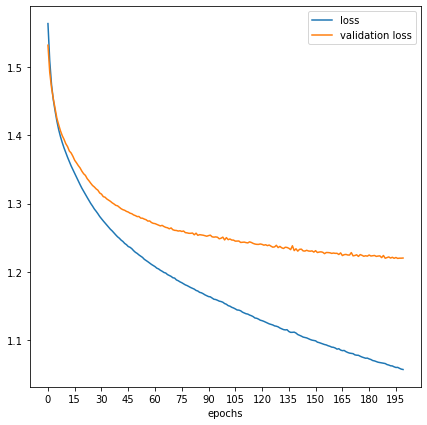

In [170]:
plt.figure(figsize=(7,7))
plt.plot(loss, label="loss")
plt.plot(val_loss, label="validation loss")
plt.legend()
plt.xticks(np.arange(0, 200, step=15))
plt.xlabel('epochs')
plt.show()

Same as for the accuracy, there is an overfitting from the 60th epoch

We need to reduce the epoch number to avoid the overfitting.
I retake the last model but with 60 epochs.

In [171]:
history_3 = model_3.fit(train_X, train_y, validation_split=0.2, batch_size=512, epochs = 60)

Epoch 1/60
13/13 [==============================] - 0s 10ms/step - loss: 1.0562 - accuracy: 0.5847 - val_loss: 1.2206 - val_accuracy: 0.5013
Epoch 2/60
13/13 [==============================] - 0s 6ms/step - loss: 1.0559 - accuracy: 0.5882 - val_loss: 1.2197 - val_accuracy: 0.5006
Epoch 3/60
13/13 [==============================] - 0s 6ms/step - loss: 1.0558 - accuracy: 0.5865 - val_loss: 1.2203 - val_accuracy: 0.4968
Epoch 4/60
13/13 [==============================] - 0s 6ms/step - loss: 1.0557 - accuracy: 0.5884 - val_loss: 1.2198 - val_accuracy: 0.5013
Epoch 5/60
13/13 [==============================] - 0s 6ms/step - loss: 1.0547 - accuracy: 0.5854 - val_loss: 1.2204 - val_accuracy: 0.5038
Epoch 6/60
13/13 [==============================] - 0s 6ms/step - loss: 1.0531 - accuracy: 0.5863 - val_loss: 1.2172 - val_accuracy: 0.4987
Epoch 7/60
13/13 [==============================] - 0s 6ms/step - loss: 1.0521 - accuracy: 0.5878 - val_loss: 1.2192 - val_accuracy: 0.4987
Epoch 8/60
13/13 [=

In [172]:
model_3.evaluate(test_X, test_y)

63/63 [==============================] - 0s 989us/step - loss: 1.2093 - accuracy: 0.5130


[1.2093394994735718, 0.5129740238189697]

In [173]:
accuracy = history_3.history["accuracy"]

In [174]:
val_accuracy = history_3.history["val_accuracy"]

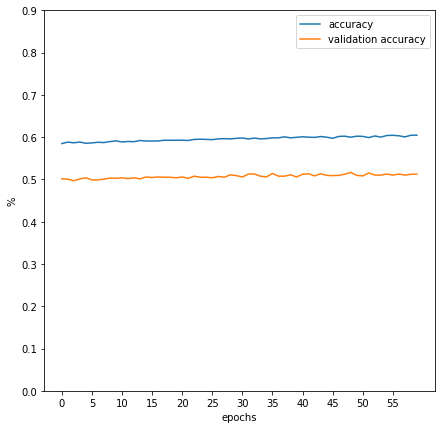

In [175]:
plt.figure(figsize=(7,7))
plt.plot(accuracy, label="accuracy")
plt.plot(val_accuracy, label="validation accuracy")
plt.legend()
plt.xticks(np.arange(0, 60, step=5))
plt.yticks(np.arange(0,1,step = 0.1))
plt.xlabel('epochs')
plt.ylabel("%")
plt.show()

Almost 60% of accuracy and as expected no overfitting.

In [176]:
loss = history_3.history["loss"]

In [177]:
val_loss = history_3.history["val_loss"]

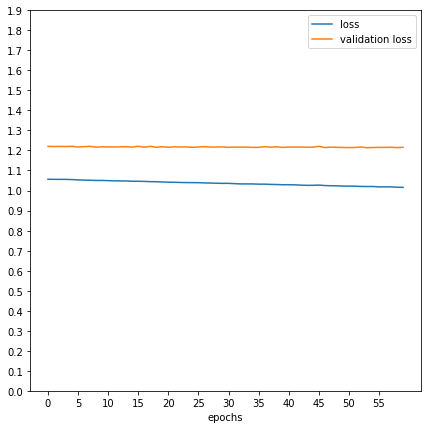

In [178]:
plt.figure(figsize=(7,7))
plt.plot(loss, label="loss")
plt.plot(val_loss, label="validation loss")
plt.legend()
plt.xticks(np.arange(0, 60, step=5))
plt.yticks(np.arange(0,2,step = 0.1))
plt.xlabel('epochs')
plt.show()

Now that we have observed the model with a different epoch number, let's try to apply different optimizer to it

In [179]:
def fit_model_opt(model, trainX, trainy, testX, testy, opt_name):
    
    model.compile(
        loss='categorical_crossentropy',
        optimizer=opt_name,
        metrics=['accuracy']
    )
    history = model.fit(trainX, trainy, validation_split=0.2, epochs=60, verbose=0)
    plt.plot(history.history['accuracy'], label='train', color='r')
    plt.plot(history.history['val_accuracy'], label='test', color='b')
    plt.title(f'opt={opt_name}', pad=-50)

Here I compare 3 distinct optimizers : Adam, Adagrad, RMSprop 

#### Optimizer choice

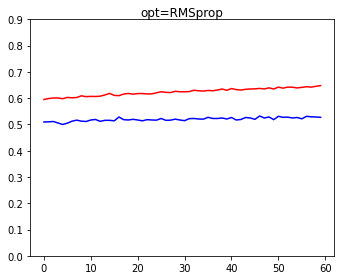

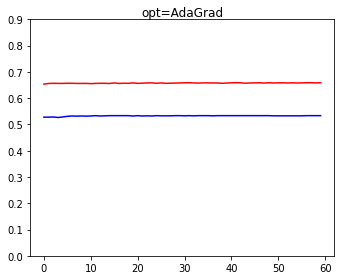

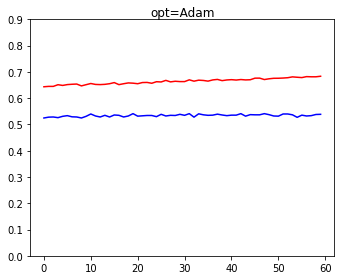

In [180]:
opt_names = ["RMSprop", "AdaGrad", "Adam"]
for i, opt in enumerate(opt_names):
    plt.figure(figsize=(12,20))
    plot_no = 420 + (i + 1)
    plt.subplot(plot_no)
    fit_model_opt(model_3,train_X, train_y, test_X, test_y, opt)
    plt.yticks(np.arange(0,1,step = 0.1))
    plt.show()

As we can see, AdaGrad is slightly better than the 2 other optimizers. Indeed the variance is a bit lower.

In [181]:
def fit_model2(model, trainX, trainy, testX, testy, lrate):
    
    model.compile(
        loss='categorical_crossentropy',
        optimizer=Adagrad(learning_rate=lrate),
        metrics=['accuracy']
    )
    history = model.fit(trainX, trainy, validation_split=0.2, epochs=60, verbose=0)
    plt.plot(history.history['accuracy'], label='train', color='r')
    plt.plot(history.history['val_accuracy'], label='test', color='b')
    plt.title(f'lrate={lrate}', pad=-50)

#### Learning rate choice

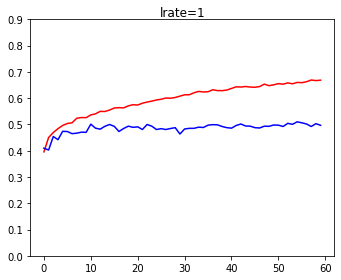

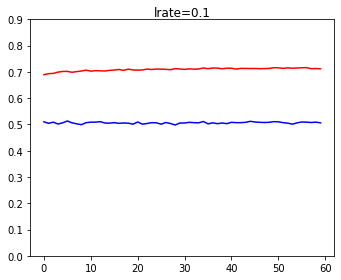

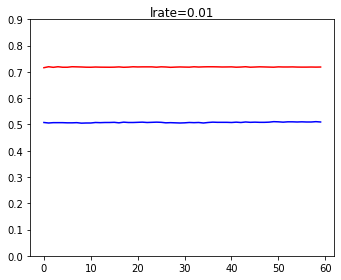

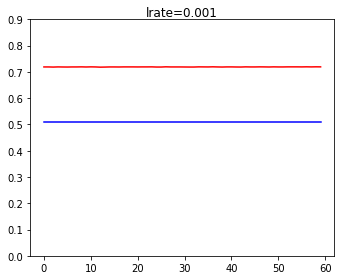

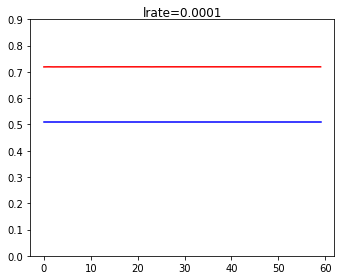

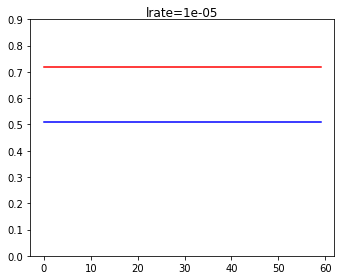

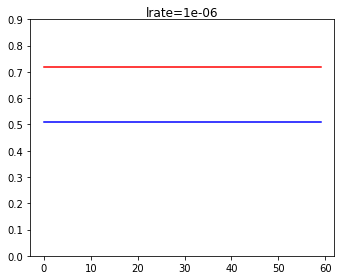

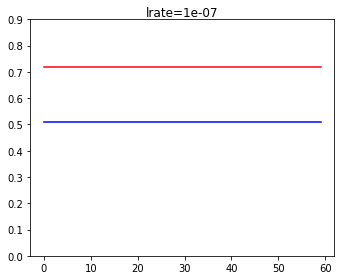

In [182]:
learning_rates = [1 * 10**(-n) for n in range(8)]
for i in range(len(learning_rates)):
    plt.figure(figsize=(12,20))
    plot_no = 420 + (i + 1)
    plt.subplot(plot_no)
    fit_model2(model_3, train_X, train_y, test_X, test_y, learning_rates[i])
    plt.yticks(np.arange(0,1,step = 0.1))
    plt.show()

Now, we need to determine which learning rate fits best the model. We still have to take the variance in consideration. Thus we can choose a learning rate of 0.01

In [183]:
model_3.compile(
        loss='categorical_crossentropy',
        optimizer=Adagrad(learning_rate=0.01),
        metrics=['accuracy']
    )
history_3 = model_3.fit(train_X, train_y, validation_split=0.2, epochs=60, verbose=0)

In [184]:
model_3.evaluate(test_X, test_y)

63/63 [==============================] - 0s 951us/step - loss: 1.5440 - accuracy: 0.4945


[1.544002652168274, 0.4945109784603119]

In [185]:
accuracy = history_3.history["accuracy"]

In [186]:
val_accuracy = history_3.history["val_accuracy"]

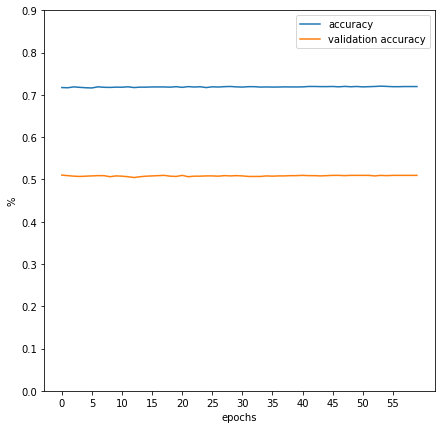

In [187]:
plt.figure(figsize=(7,7))
plt.plot(accuracy, label="accuracy")
plt.plot(val_accuracy, label="validation accuracy")
plt.legend()
plt.xticks(np.arange(0, 60, step=5))
plt.yticks(np.arange(0,1,step = 0.1))
plt.xlabel('epochs')
plt.ylabel("%")
plt.show()

In [188]:
loss = history_3.history["loss"]

In [189]:
val_loss = history_3.history["val_loss"]

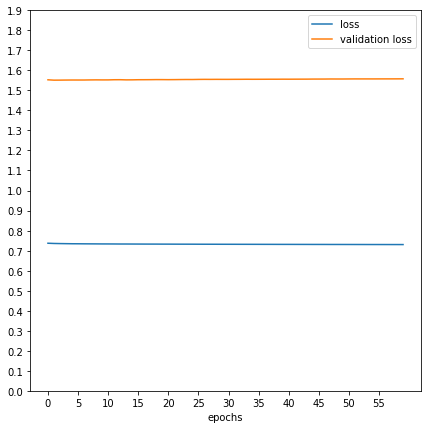

In [190]:
plt.figure(figsize=(7,7))
plt.plot(loss, label="loss")
plt.plot(val_loss, label="validation loss")
plt.legend()
plt.xticks(np.arange(0, 60, step=5))
plt.yticks(np.arange(0,2,step = 0.1))
plt.xlabel('epochs')
plt.show()

With these parameters (optimizer = Adagrad & learning rate = 0.01) we reach an accuracy of 70%.

Let's apply a reglizer l2 of 0.0005

#### Regulizer L2

In [191]:
model_3_bis = keras.Sequential()
model_3_bis.add(keras.layers.Dense(128, input_dim = 32, activation = "relu",kernel_regularizer=keras.regularizers.l2(0.0005)))
model_3_bis.add(keras.layers.Dense(5, activation= "softmax",kernel_regularizer=keras.regularizers.l2(0.0005)))

In [192]:
model_3_bis.compile(
        loss='categorical_crossentropy',
        optimizer=Adagrad(learning_rate=0.01),
        metrics=['accuracy']
    )
history_3 = model_3_bis.fit(train_X, train_y, validation_split=0.2, epochs=60, verbose=0)

In [193]:
model_3_bis.evaluate(test_X, test_y)

63/63 [==============================] - 0s 979us/step - loss: 1.3633 - accuracy: 0.4521


[1.3633049726486206, 0.45209580659866333]

In [194]:
accuracy = history_3.history["accuracy"]

In [195]:
val_loss = history_3.history["val_loss"]

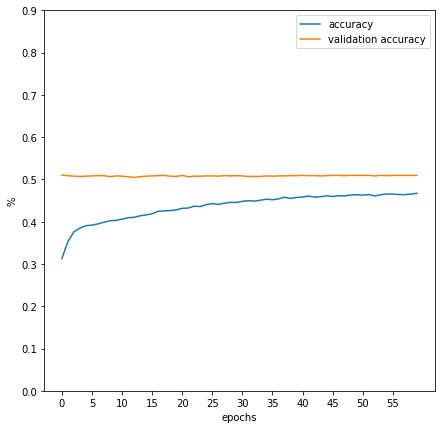

In [196]:
plt.figure(figsize=(7,7))
plt.plot(accuracy, label="accuracy")
plt.plot(val_accuracy, label="validation accuracy")
plt.legend()
plt.xticks(np.arange(0, 60, step=5))
plt.yticks(np.arange(0,1,step = 0.1))
plt.xlabel('epochs')
plt.ylabel("%")
plt.show()

In [197]:
loss = history_3.history["loss"]

In [198]:
val_loss = history_3.history["val_loss"]

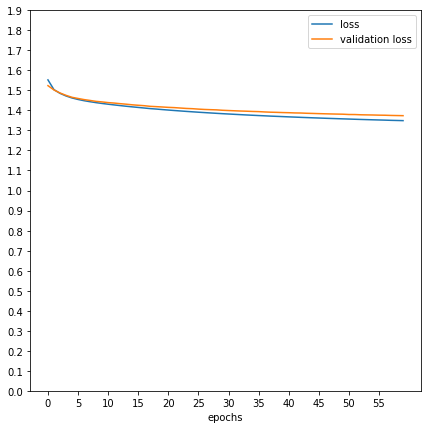

In [199]:
plt.figure(figsize=(7,7))
plt.plot(loss, label="loss")
plt.plot(val_loss, label="validation loss")
plt.legend()
plt.xticks(np.arange(0, 60, step=5))
plt.yticks(np.arange(0,2,step = 0.1))
plt.xlabel('epochs')
plt.show()

It leads to nothing because it is not better than previously, especially for the accuracy

#### Decay

Let's see what we obtain with a various decay

In [204]:
def fit_model_decay(model,trainX, trainy, testX, testy, decay):
    model.compile(
        loss='categorical_crossentropy',
        optimizer=Adagrad(learning_rate=0.01, decay=decay),
        metrics=['accuracy']
    )
    history = model.fit(trainX, trainy, validation_split=0.2, epochs=60, verbose=0)
    plt.plot(history.history['accuracy'], label='train', color='r')
    plt.plot(history.history['val_accuracy'], label='test', color='b')
    plt.title(f'decay={decay}', pad=-50)

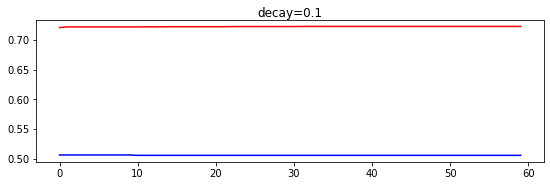

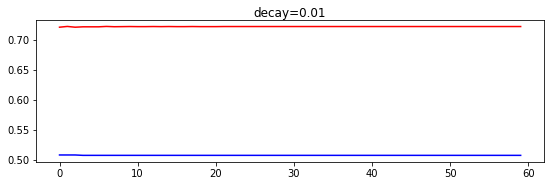

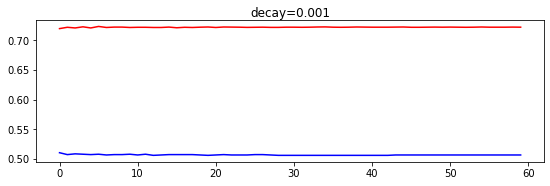

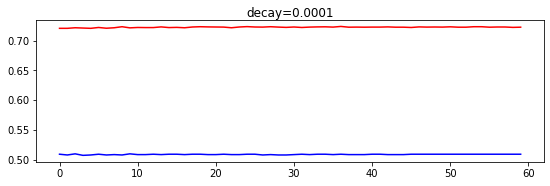

In [205]:
decays = [1*10**(-n) for n in range(1, 5)]
for i, d in enumerate(decays):
    plt.figure(figsize=(20,12))

    plot_no = 420 + (i + 1)
    plt.subplot(plot_no)
    fit_model_decay(model_3, train_X, train_y, test_X, test_y, d)
    plt.show()

This trial is not concluant, many decays don't change the model as we can see above

### Conclusion

To conclude, I have implemented 3 different neural networks with differrent node numbers inside each layer. They are quite similar as well on the structure and the reults. I have developped one of them (the third) by trying several parameters in order ro improve the prediction rate.




Louis ATALLAH.